In [142]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy import random as ran

%matplotlib inline

In [143]:
l = 0.607
dl = 0.002
T = [[12.47, 15.88, 15.75, 15.79, 15.75, 15.63, 14.94, 15.22, 15.78, 15.66],
     [15.91, 15.88, 15.93, 15.97, 16.09, 15.72, 15.90, 15.89, 15.87, 15.85],
     [15.84, 15.98, 15.95, 15.85, 15.98, 15.98, 15.83, 15.83, 15.89, 15.93],
     [16.60, 16.25, 17.72, 16.28, 16.31, 16.53, 16.09, 16.28, 16.50, 16.37],
     [16.28, 16.31, 16.75, 16.66, 16.41, 16.22, 16.53, 16.56, 16.40, 16.29],
     [16.78, 16.72, 16.78, 16.94, 16.62, 16.88, 16.56, 16.37, 16.75, 16.94],
     [16.69, 17.22, 16.94, 16.96, 17.12, 17.35, 17.16, 17.04, 17.03, 17.13],
     [17.07, 17.13, 17.03, 17.00, 16.94, 17.12, 17.03, 17.00, 16.87, 17.04],
     [17.60, 17.22, 17.43, 17.40, 17.43, 17.10, 17.25, 17.25, 17.22, 17.38]]
dt = 0.01
T = [[x/10. for x in t] for t in T]
sq = [[x**2 for x in t] for t in T]
th = 30
dth = 1
N = 10
gr = 8
pi = np.pi
T0 = 2 * pi * (l/9.81)**.5

t2 = np.zeros(gr)
for i in range(0, gr):
    t2[i] = (30 + i*5)*pi/180

Teor = np.zeros(N)
for i in range(0, N):
    Teor[i] = T0 * (1 + (pi/6 + pi/36 * i)**2 /16)

In [144]:
def Somma(v, lun):
    ris = 0
    for i in range(0, lun):
        ris = ris + v[i]
    return ris

med = np.zeros(gr)
err = np.zeros(gr)
for i in range(0, gr):
    med[i] = Somma(T[i], N)/N
    err[i] = (Somma(sq[i], N)/N - med[i]**2 + dt**2)**.5
    print("Per un angolo di", 30+5*i, "gradi, T = ", round(med[i], 3), "+-", round(err[i], 3), "s, contro un periodo teorico di ", round(Teor[i], 2), "s")

Per un angolo di 30 gradi, T =  1.529 +- 0.098 s, contro un periodo teorico di  1.59 s
Per un angolo di 35 gradi, T =  1.59 +- 0.013 s, contro un periodo teorico di  1.6 s
Per un angolo di 40 gradi, T =  1.591 +- 0.012 s, contro un periodo teorico di  1.61 s
Per un angolo di 45 gradi, T =  1.649 +- 0.044 s, contro un periodo teorico di  1.62 s
Per un angolo di 50 gradi, T =  1.644 +- 0.02 s, contro un periodo teorico di  1.64 s
Per un angolo di 55 gradi, T =  1.673 +- 0.02 s, contro un periodo teorico di  1.65 s
Per un angolo di 60 gradi, T =  1.706 +- 0.02 s, contro un periodo teorico di  1.67 s
Per un angolo di 65 gradi, T =  1.702 +- 0.012 s, contro un periodo teorico di  1.69 s


In [145]:
#Coefficiente di correlazione fra T e theta^2
num = 0
den1 = 0
den2 = 0
Tmed = Somma(med, gr)/gr
t2med = Somma(t2, gr)/gr
for i in range(0, gr):
    num = num + (med[i] - Tmed)*(t2[i] - t2med)
    den1 = den1 + (med[i] - Tmed)**2
    den2 = den2 + (t2[i] - t2med)**2
    
r = num/(den1 * den2)**.5
print("Il coefficiente di correlazione è", r)

Il coefficiente di correlazione è 0.9636446859364053


La best fit per i  dati in questione è: T = ( 0.244  +- 0.029 ) theta^2 + ( 1.432 +- 0.026 )


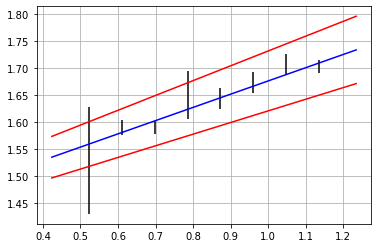

In [146]:
w = [d**(-2) for d in err]
delta = Somma(w, gr) * Somma(np.multiply(w, np.power(t2, 2)), gr) - (Somma(np.multiply(w, t2), gr))**2

A = (Somma(np.multiply(w, np.power(t2, 2)), gr) * Somma(np.multiply(w, med), gr) - Somma(np.multiply(w, t2), gr) * Somma(np.multiply(w, np.multiply(t2, med)) , gr))/delta
unA = (Somma(np.multiply(w, np.power(t2, 2)), gr)/delta)**.5

B = (Somma(w, gr) * Somma(np.multiply(w, np.multiply(t2, med)) , gr) - Somma(np.multiply(w, t2), gr) * Somma(np.multiply(w, med), gr))/delta
unB = (Somma(w, gr)/delta)**.5

print("La best fit per i  dati in questione è: T = (", round(B, 3), " +-", round(unB, 3), ") theta^2 + (", round(A, 3), "+-", round(unA, 3), ")" )

xvals = np.linspace(t2[0]-0.1, t2[gr-1]+.1, 200)
yvals1 = B*xvals + A
yvals2 = (B-unB)*xvals + (A-unA)
yvals3 = (B+unB)*xvals + (A+unA)

plt.plot(xvals, yvals1, 'b', xvals, yvals2, 'r', xvals, yvals3, 'r')
for i in range(0, gr):
    plt.vlines(t2[i], med[i] - err[i], med[i] + err[i])
plt.grid()

In [147]:
#Ricavare g
#Sappiamo che B = T_0 = 2 pi sqrt(l/g), g = 4 pi^2 l/B^2

g = 4 * pi**2 * l / (A)**2 

errg = g * (dl/l + 2 * unA/A)

print("L'accelerazione di gravità è: g = (", round(g, 3), "+-", round(errg, 3), ") m/s^2" )

L'accelerazione di gravità è: g = ( 11.694 +- 0.462 ) m/s^2
